<a id='back_to_top'></a>
# Water Bottle Image Classification Dataset
"Classifying Water Bottle Images Based on Water Level Using Machine Learning"

**Created By**: Wuttipat S. <br>
**Created Date**: 2023-02-10 <br>
**Status**: <span style="color:red">Ongoing</span>

# Table of contents

## [Introduction](#introduction)
- [Project Objective](#project_objective)
- [Dataset Description](#dataset_description)
- [About this directory](#about_this_directory) 

### [Importing Data from the Directory](#load_dataset) 
### [Data Preprocessing](#data_preprocessing) 
### [Machine Learning Model](#machine_learning_model) 
### [Note](#note)

<a id='introduction'></a>
# Introduction

<a id='project_objective'></a>
## Project Objective: 
The main objective of this project is to develop a machine learning model that can accurately classify water bottle images based on their water levels. The model will be trained on a dataset of water bottle images, with each image being labeled as Full water level, Half water level, or Overflowing. The goal is to develop a model that can accurately classify a given water bottle image based on its water level.

<a id='dataset_description'></a>
## Dataset Description: 
The dataset consists of water bottle images that have been classified based on the level of water inside the bottle. There are three categories of images: Full water level, Half water level, and Overflowing. Each category contains a number of images of water bottles with the corresponding water level. The purpose of the dataset is to be used for an image classification problem, where a machine learning model is trained to classify the water level of a given water bottle image.

The dataset is intended to be used for training and testing a machine learning model for image classification. The model will be trained on the provided images, with each image being labeled as either Full water level, Half water level, or Overflowing. The goal of the model is to accurately classify a given water bottle image based on its water level.

The dataset consists of a number of water bottle images, each of which has been classified based on the water level inside the bottle. The images in the Full water level category show water bottles with the maximum possible amount of water inside, while the images in the Half water level category show water bottles with roughly half the maximum amount of water inside. The images in the Overflowing category show water bottles with more water inside than the maximum capacity of the bottle, resulting in water spilling out.

The dataset is likely to be useful for a variety of applications, such as developing automated systems for monitoring and managing water levels in containers or for use in a general image classification problem. The dataset may also be useful for research purposes, as it allows for the development and testing of machine learning models for image classification tasks.

<a id='about_this_directory'></a>
### About this directory
"This folder contains 308 images of water bottles with full water levels. The images show a variety of water bottle sizes and shapes, and are captured from a range of angles. The water bottles are made of plastic and are in good condition. These images could be useful for training a machine learning model to recognize full water levels in water bottles."

<a id='load_dataset'></a>
### Importing Data from the Directory
We will start by importing the data from the directory. We will use the OS module in python to access the directory and its sub-directories. We will then use the OpenCV library to read the image files and convert them into arrays that can be processed by the machine learning model.

In [1]:
import os
import cv2
import numpy as np

data = []
labels = []

# Access the directory and sub-directories and so on
directory = "./water-bottle-dataset"

for sub_folder in os.listdir(directory):
    sub_folder_path = os.path.join(directory, sub_folder)
    for sub_sub_folder in os.listdir(sub_folder_path):
        sub_sub_folder_path = os.path.join(sub_folder_path, sub_sub_folder)
        for image_file in os.listdir(sub_sub_folder_path):
            if image_file.endswith(".jpeg"):
                image_path = os.path.join(sub_sub_folder_path, image_file)
                # Read the image using OpenCV
                image = cv2.imread(image_path) #the decoded images stored in **B G R** order.
                # Resize the image to a standard size
                image = cv2.resize(image, (224, 224))
                # Append the image to the data list
                data.append(image)
                # Append the label to the labels list
                labels.append(sub_folder)

# Convert the data and labels lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


<a id='data_preprocessing'></a>
### Cleaning and Data Preprocessing
Now that we have imported the data, we need to clean and preprocess the data so that it can be used to train the machine learning model. The following preprocessing steps will be performed:

1. Normalizing the pixel values to a range between 0 and 1
2. Converting the labels into one-hot encoded arrays

In [2]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0

# Preprocess the input data
#data = np.reshape(data, (data.shape[0], 224, 224, 3))

# Convert the labels into one-hot encoded arrays
labels_one_hot = np.zeros((labels.shape[0], 3))

for i, label in enumerate(labels):
    if label == "Full  Water level":
        labels_one_hot[i, 0] = 1
    elif label == "Half Water Level":
        labels_one_hot[i, 1] = 1
    else:
        labels_one_hot[i, 2] = 1

In [3]:
data.shape

(429, 224, 224, 3)

#### Show a sample of images from the dataset

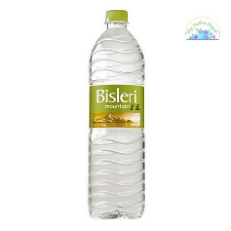

Full  Water level


In [13]:
import matplotlib.pyplot as plt

img = data[55]
plt.imshow(img)
plt.axis('off')
plt.show()
print(labels[55])

<a id='machine_learning_model'></a>
### Machine Learning Model
Finally, we will build, train, and evaluate machine learning models for the image classification problem. We will use the Keras library in Python to build and train the models.

In [7]:
import tensorflow as tf
from tensorflow import keras

# Build the model using a Convolutional Neural Network
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(data, labels_one_hot, batch_size=32, epochs=10, validation_split=0.2)
history = model.fit(data,
                    labels_one_hot,
                    batch_size=32,
                    epochs=15,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(data, labels_one_hot)
print("Test accuracy: ", test_acc)

Epoch 1/15
11/11 [==============================] - 15s 1s/step - loss: 0.6971 - accuracy: 0.6793 - val_loss: 1.1359 - val_accuracy: 0.0698
Epoch 2/15
11/11 [==============================] - 15s 1s/step - loss: 0.4544 - accuracy: 0.7813 - val_loss: 2.0973 - val_accuracy: 0.0233
Epoch 3/15
11/11 [==============================] - 14s 1s/step - loss: 0.4420 - accuracy: 0.7813 - val_loss: 1.1484 - val_accuracy: 0.1395
Epoch 4/15
11/11 [==============================] - 14s 1s/step - loss: 0.3710 - accuracy: 0.8251 - val_loss: 1.1356 - val_accuracy: 0.2209
Epoch 5/15
11/11 [==============================] - 14s 1s/step - loss: 0.2948 - accuracy: 0.8630 - val_loss: 1.4176 - val_accuracy: 0.2674
Epoch 6/15
11/11 [==============================] - 14s 1s/step - loss: 0.2277 - accuracy: 0.8921 - val_loss: 1.1259 - val_accuracy: 0.5116
Epoch 7/15
11/11 [==============================] - 15s 1s/step - loss: 0.1823 - accuracy: 0.9155 - val_loss: 1.7717 - val_accuracy: 0.3140
Epoch 8/15
11/11 [==

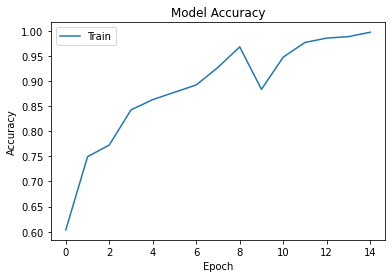

In [5]:
import matplotlib.pyplot as plt

# Plot the accuracy history
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

<a id='note'></a>
# Note
#### Improving a machine learning model can be achieved by using various techniques such as:

1. **Feature Engineering**: Adding or modifying the features used in the model to better capture the underlying patterns in the data.

2. **Model Selection**: Choosing a different machine learning model that is more suitable for the data and the problem being solved.

3. **Hyperparameter Tuning**: Adjusting the parameters of the machine learning model to improve its performance. This can be done manually or using techniques such as grid search or random search.

4. **Ensemble Methods**: Combining multiple models to create a more robust model. This can be done by averaging the predictions of multiple models or by training a separate model to make predictions based on the outputs of other models.

5. **Regularization**: Adding a penalty term to the loss function to prevent overfitting and improve generalization.

6. **Data Augmentation**: Increasing the size of the dataset by generating new data samples based on the original data. This can help to prevent overfitting and improve generalization.

7. **Early Stopping**: Stopping the training process when the model's performance on the validation set starts to deteriorate. This can prevent overfitting and help to avoid the use of models that are too complex.

8. **Transfer Learning**: Reusing pre-trained models to reduce the time and computational resources required to train a new model.

# [Back to top](#back_to_top)